## Упражнение 1

В файле `melting.txt` приведены значения флуоресценции различных образцов в диапазоне температур от 28 до 95 градусов. Сами эти абсолютные значения не слишком интересуют исследователей: важнее форма кривых. Чтобы было удобнее сравнивать кривые между собой, отнормируйте их (минимальное значение - 0, максимальное - 1, промежуточное значение делится на разницу между максимальным и минимальным значением). Постройте графики получившихся кривых.

<function matplotlib.pyplot.show(close=None, block=None)>

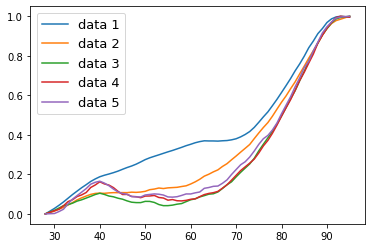

In [24]:
import numpy as np 
import matplotlib.pyplot as plt

def x(name):
    file = open(name, 'r')
    flag = True 
    x = []
    for line in file:
        if flag==False:
            fl = line.split()
            x.append(float(fl[0]))
        flag=False
    file.close()
    return x

def y(name):
    file = open(name, 'r')
    flag=True 
    y1 = []
    y2 = []
    y3 = []
    y4 = []
    y5 = []
    for line in file:
        if flag==False:
            fl = line.split()
            y1.append(float(fl[1]))
            y2.append(float(fl[2]))
            y3.append(float(fl[3]))
            y4.append(float(fl[4]))
            y5.append(float(fl[5]))
        flag=False
    file.close()
    return y1, y2, y3, y4, y5

x = x('melting.txt')
y1, y2, y3, y4, y5 = y('melting.txt')

def graph(value):
    maximum = np.max(value)  
    minimum = np.min(value)
    change = maximum - minimum
    a=np.argmax(value) 
    b=np.argmin(value)
    value[a] = 1
    value[b] = 0
    for i in range(len(value)):
        if i!=a and i!=b:
            value[i] = (value[i] - minimum)/change
    return value

y_m = [y1, y2, y3, y4, y5]
for i in range (len(y_m)):
    value = np.array(y_m[i])
    graph(value)
    plt.plot(x, value, label = r'data ' + str(i+1))
    plt.legend(loc='best', fontsize=13)
             
             
plt.show

## Упражнение 2

Прочитайте файлы `ex2_1.txt` и `ex2_2.txt` в двумерный массив, вычислите среднее по каждому столбцу. Читая файлы, исходите из предположения, что количество столбцов в файле заранее неизвестно. Числа в строке разделены табуляцией.

In [16]:
import numpy as np

ex1 = []
file = open('ex2_1.txt', 'r')
for line in file:
    ex1.append([float(x) for x in line.split("\t")])

ex2 = []
file = open('ex2_2.txt', 'r')
for line in file:
    ex2.append([float(x) for x in line.split("\t")])

ex2_1 = np.array(ex1)
print(ex2_1.mean(axis=0))

ex2_2 = np.array(ex2)
print(ex2_2.mean(axis=0))

[50.35 58.65 50.55 45.35 57.4 ]
[39.61111111 55.5        51.55555556 53.55555556 49.94444444 58.5       ]


## Упражнение 3

Задан двумерный массив:

```
square = np.array([
    [16, 3, 2, 13],
    [5, 10, 11, 8],
    [9, 6, 7, 12],
    [4, 15, 14, 1]
])
```
Вычислите сумму чисел в каждом столбце, в каждой строке, в каждом квадрате 2×2, который можно вырезать из имеющегося (5 шт). Выведите её на экран для каждого случая.

In [20]:
square = np.array([[16, 3, 2, 13], [5, 10, 11, 8], [9, 6, 7, 12], [4, 15, 14, 1]])

print('суммa чисел в каждом строке = ', square.sum(axis = 1))
print('суммa чисел в каждой столбце = ', square.sum(axis = 0))
print('сумма чисел в левом верхнем углу = ', square[:2, :2].sum(axis = 1).sum(axis = 0)) #1
print('сумма чисел в правом верхнем  углу = ', square[:2, 2:].sum(axis=1).sum(axis=0)) #2
print('сумма чисел в правом нижнем углу = ', square[2:, 2:].sum(axis = 1).sum(axis = 0)) #3
print('сумма чисел в левом нижнем углу = ', square[2:, :2].sum(axis = 1).sum(axis = 0)) #4
print('сумма чисел посередине = ', square[1:3:, 1: 3:].sum(axis = 1).sum(axis = 0)) #5

суммa чисел в каждом строке =  [34 34 34 34]
суммa чисел в каждой столбце =  [34 34 34 34]
сумма чисел в левом верхнем углу =  34
сумма чисел в правом верхнем  углу =  34
сумма чисел в правом нижнем углу =  34
сумма чисел в левом нижнем углу =  34
сумма чисел посередине =  34


## Упражнение 4

Вычислите среднее и стандартное отклонение чисел из файла ex4.txt, затем найдите выбросы (x < Q1 - 1.5 × IQR или x > Q3 + 1.5 × IQR и вычислите среднее и стандартное отклонение без них.

In [23]:
import numpy as np

numbers = []
file = open('ex4.txt', 'r')
for line in file:
    numbers.append([float(x) for x in line.split()])

print('среднее отклонение = ', str(np.mean(numbers)))
print('стандартное отклонение = ', np.std(numbers))
      
numbers.sort()
x = [i for i in np.quantile(numbers, [0.25, 0.5, 0.75])]
numbers_d = []
for i in numbers:
    if i<(x[2] + 1.5 * (x[2] - x[0])) and i>(x[0] - 1.5 * (x[2] - x[0])):
            numbers_d.append(i)
                  
print('среднее отклонение без выбросов = ', str(np.mean(numbers_d)))
print('стандартное отклонение без выбросов = ', np.std(numbers_d))

среднее отклонение =  4382.08
стандартное отклонение =  1816.365239041972
среднее отклонение без выбросов =  5071.064814814815
стандартное отклонение без выбросов =  572.7614601590126
